<img src="TrumpTrudeau.jpg"/>

In [2]:
# HELPER FUNCTION FOR PLOTTING
from matplotlib import pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figure=0):
   
    plt.figure(figure)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def plot_and_return_top_features(classifier, vectorizer, top_features=20):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:top_features]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-top_features:]
    top_coefficients = np.hstack([topn_class1, topn_class2])
    if set(topn_class1).union(topn_class2):
        top_coefficients = topn_class1
        for ce in topn_class2:
            if ce not in topn_class1:
                top_coefficients.append(x)

    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in [tc[0] for tc in top_coefficients]]
    plt.bar(np.arange(len(top_coefficients)), [tc[0] for tc in top_coefficients], color=colors)
    plt.xticks(np.arange(len(top_coefficients)),
               [tc[1] for tc in top_coefficients], rotation=60, ha='right')
    plt.show()
    return top_coefficients

In [1]:
import random

In [2]:
random.seed(53)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.naive_bayes import MultinomialNB

In [6]:
from sklearn.svm import LinearSVC

In [7]:
from sklearn import metrics

In [8]:
import pandas as pd

In [12]:
tweets_df=pd.read_csv('tweet_data.csv',index_col=0)

In [13]:
tweets_df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [15]:
y=tweets_df['author']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(tweets_df['status'],y,random_state=53,test_size=.33)

In [18]:
count_vectorizer=CountVectorizer(stop_words='english',max_df=0.9,min_df=0.05)

In [19]:
count_train=count_vectorizer.fit_transform(X_train)

In [20]:
count_test=count_vectorizer.transform(X_test)

In [21]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.05)

In [22]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train)

In [24]:
tfidf_test=tfidf_vectorizer.transform(X_test)

In [25]:
tfidf_nb=MultinomialNB()

In [26]:
tfidf_nb.fit(tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
tfidf_nb_pred=tfidf_nb.predict(tfidf_test)

In [28]:
tfidf_nb_score=metrics.accuracy_score(tfidf_nb_pred,y_test)

In [29]:
count_nb=MultinomialNB()

In [30]:
count_nb.fit(count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
count_nb_pred=count_nb.predict(count_test)

In [32]:
count_nb_score=metrics.accuracy_score(count_nb_pred,y_test)

In [33]:
print('NaiveBayes Tfidf Score:',tfidf_nb_score)
print('NaiveBayes Count Score:',count_nb_score)

NaiveBayes Tfidf Score: 0.803030303030303
NaiveBayes Count Score: 0.7954545454545454


In [34]:
%matplotlib inline

In [41]:
tfidf_nb_cm=metrics.confusion_matrix(y_test,tfidf_nb_pred,labels=['Donald J. Trump','Justin Trudeau'])

In [42]:
count_nb_cm=metrics.confusion_matrix(y_test,count_nb_pred,labels=['Donald J. Trump','Justin Trudeau'])

Confusion matrix, without normalization


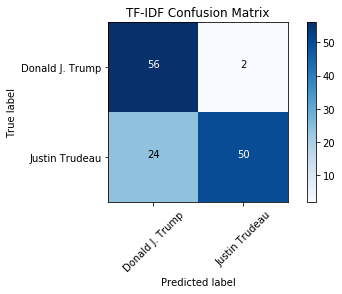

In [43]:
# CONFUSION MATRIX WITH TF-IDF VECTORIZER
plot_confusion_matrix(tfidf_nb_cm,classes=['Donald J. Trump','Justin Trudeau'],title='TF-IDF Confusion Matrix')

Confusion matrix, without normalization


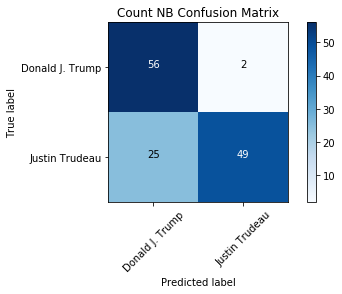

In [44]:
# CONFUSION MATRIX WITH COUNT VECTORIZER
plot_confusion_matrix(count_nb_cm,classes=['Donald J. Trump','Justin Trudeau'],title='Count NB Confusion Matrix')

In [45]:
tfidf_svc=LinearSVC()

In [46]:
tfidf_svc.fit(tfidf_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
tfidf_svc_pred=tfidf_svc.predict(tfidf_test)

In [48]:
tfidf_svc_score=metrics.accuracy_score(tfidf_svc_pred,y_test)

In [52]:
print('LinearSVC Score: %0.3f'%tfidf_svc_score)

LinearSVC Score: 0.841


In [54]:
svc_cm=metrics.confusion_matrix(y_test,tfidf_svc_pred,labels=['Donald J. Trump','Justin Trudeau'])

Confusion matrix, without normalization


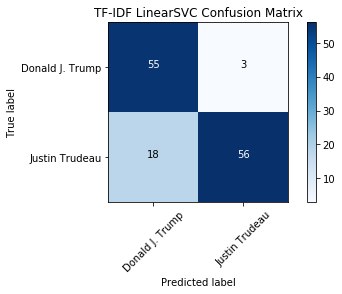

In [55]:
# CONFUSION MATRIX WITH LINEAR SVC
plot_confusion_matrix(svc_cm,classes=['Donald J. Trump','Justin Trudeau'],title="TF-IDF LinearSVC Confusion Matrix")

In [56]:
from pprint import pprint

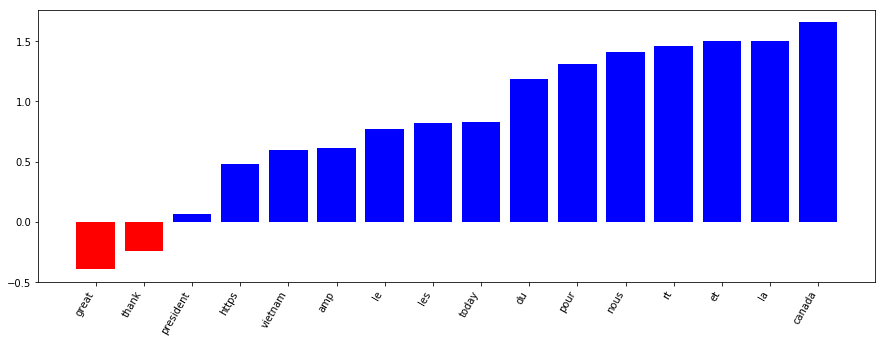

In [57]:
top_features=plot_and_return_top_features(tfidf_svc,tfidf_vectorizer)

In [58]:
trump_tweet="fake news"

In [59]:
trudeau_tweet='canada'

In [60]:
trump_tweet_vectorized=tfidf_vectorizer.transform([trump_tweet])

In [61]:
trudeau_tweet_vectorized=tfidf_vectorizer.transform([trudeau_tweet])

In [62]:
trump_tweet_pred=tfidf_svc.predict(trump_tweet_vectorized)

In [63]:
trudeau_tweet_pred=tfidf_svc.predict(trudeau_tweet_vectorized)

In [64]:
print("Predicted Trump Tweet ",trump_tweet_pred)

Predicted Trump Tweet  ['Donald J. Trump']


In [65]:
print("Predicted Trudeau Tweet",trudeau_tweet_pred)

Predicted Trudeau Tweet ['Justin Trudeau']


# Thank you!